In [366]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [353]:
df = pd.read_csv("big_df.csv")

In [350]:
predict=datetime.datetime(2015,1,1)

##baseline

In [315]:
df_temp = df.copy()

In [316]:
df_temp.Date = pd.to_datetime(df_temp.Date)

In [317]:
df = df_temp.sort('Date').set_index('Date')

In [342]:
df_b = df[df.index>=predict]

In [343]:
df_b['ud']=df_b['SP_Adj_Close']>=df_b['SP_Adj_Close'].shift(1)

In [344]:
#if future >= index, predict up
df_b['future_ud']=df_b['SP1_Close'].shift(1)>=df_b['SP_Adj_Close'].shift(1)

In [345]:
#random coin flip
df_b['random_ud']=np.random.uniform(0,1,df_b.shape[0])>0.5

In [346]:
df_b=df_b[1:]

In [347]:
baseline=df_b[['future_ud','random_ud','ud']]

In [348]:
baseline['random']=baseline.random_ud==baseline.ud
baseline['future']=baseline['future_ud']==baseline['ud']
print baseline.random.mean(),baseline.future.mean()

0.502392344498 0.555023923445


##classifier

In [349]:
df_c=df.copy()
df_c['ud_shift']=df_c['SP_Adj_Close'].shift(1)>=df_c['SP_Adj_Close'].shift(2)

In [278]:
def divide_df(df, feature,start_test):
    dataset=df[feature+['ud_shift']].dropna()
    X=dataset[feature]
    y=dataset.ud_shift
    X_train = X[X.index < start_test]
    y_train = y[y.index < start_test]    
    X_test = X[X.index >= start_test]    
    y_test = y[y.index >= start_test]
    return X_train, y_train, X_test, y_test   

In [246]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.svm import SVC

def performClassification(X_train, y_train, X_test, y_test, method, parameters):   
    if method == 'RF':   
        return performRFClass(X_train, y_train, X_test, y_test)
        
    elif method == 'KNN':
        return performKNNClass(X_train, y_train, X_test, y_test)
    
    elif method == 'SVM':   
        return performSVMClass(X_train, y_train, X_test, y_test)
    
def performRFClass(X_train, y_train, X_test, y_test):
    clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    return accuracy
        
def performKNNClass(X_train, y_train, X_test, y_test):
    clf = neighbors.KNeighborsClassifier()
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    return accuracy

def performSVMClass(X_train, y_train, X_test, y_test):
    clf = SVC()
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    return accuracy

##future

In [77]:
future=['SP1_Open','SP1_High','SP1_Low','SP1_Close','SP1_Settle','SP1_Volume','SP1_Open_Interest']

In [279]:
X_train, y_train, X_test, y_test=divide_df(df_c,future,'2015-1-1')

In [92]:
performKNNClass(X_train, y_train, X_test, y_test)

0.51424375917767984

In [93]:
performRFClass(X_train, y_train, X_test, y_test)

0.52364170337738625

In [94]:
performSVMClass(X_train, y_train, X_test, y_test)

0.52980910425844352

##commodity

In [88]:
commodity=['Gold','Silver','Corn','Soybeans','Sugar']

In [106]:
X_train, y_train, X_test, y_test=divide_df(df,commodity,)

In [107]:
performKNNClass(X_train, y_train, X_test, y_test)

0.53504273504273503

In [108]:
performRFClass(X_train, y_train, X_test, y_test)

0.5196581196581197

In [109]:
performSVMClass(X_train, y_train, X_test, y_test)

0.54700854700854706

##important

In [304]:
important=['SP1_Close','DJI_YAHOO','NASDAQ','USDCNY_Rate','DAX','Australia','HongKong','London','Paris','T10']

In [305]:
X_train, y_train, X_test, y_test=divide_df(df_c,important,predict)

In [306]:
performKNNClass(X_train, y_train, X_test, y_test)

0.48223350253807107

In [301]:
performRFClass(X_train, y_train, X_test, y_test)

0.48730964467005078

In [302]:
performSVMClass(X_train, y_train, X_test, y_test)

0.47715736040609136

In [110]:
positive=['SP1_Close','DJI_YAHOO','NASDAQ','DAX','Australia','HongKong','London','Paris','M2']

In [111]:
X_train, y_train, X_test, y_test=divide_df(df,positive,'2015-1-1')

In [112]:
performKNNClass(X_train, y_train, X_test, y_test)

0.51433691756272404

In [113]:
performRFClass(X_train, y_train, X_test, y_test)

0.49283154121863798

In [114]:
performSVMClass(X_train, y_train, X_test, y_test)

0.54121863799283154

##fundamental

In [358]:
fund=pd.read_csv('fundamental_quarterly.csv').set_index('Date')

In [362]:
fund['spread']=fund['t10']-fund['t2']
reg=LinearRegression().fit(fund[['gdp_quarter','M1','cpi','ppi','spread']],fund['SP_Adj Close'])
epreds=reg.predict(fund[['gdp_quarter','M1','cpi','ppi','spread']])
plt.plot(epreds)
plt.plot(fund['SP_Adj Close'], 'ro', markersize=5)

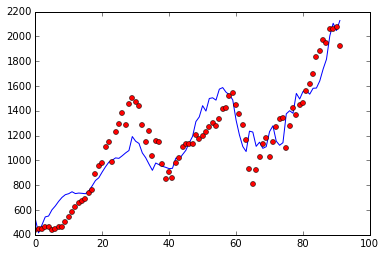